# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [19]:
fig_dir = 'data/figure'
exp_name = 'compare_number_of_user'
time_path = 'data/time/compare_number_of_user_2020_12_14_1_27_20.npy'
cost_path = 'data/cost/compare_number_of_user_2020_12_14_1_27_20.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(8, 81, step=8)
repeats = len(sizes)

# Load data

In [20]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(30,) (30,)
Wall time: 3.99 ms


# Convert to DataFrame

In [21]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000100,0.384389,0.041667,8
1,0.000000,0.879962,0.083092,16
2,0.000100,1.332966,0.258742,24
3,0.000102,2.014182,0.454363,32
4,0.000000,2.449786,0.620761,40
5,0.000100,2.928618,1.609040,48
6,0.000000,2.623922,1.707706,56
7,0.000099,3.589229,2.576428,64
8,0.000100,4.578339,33.464726,72
9,0.000294,4.177905,5.457837,80


In [22]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,6088.4,5462.2,5682.0,8
1,11083.4,9036.5,9518.5,16
2,16939.5,12416.2,12737.3,24
3,22250.0,16165.0,16799.3,32
4,27372.2,19593.4,19194.5,40
5,34643.6,23045.7,22462.3,48
6,38112.7,26305.8,24789.9,56
7,45843.6,29388.4,28403.6,64
8,51185.6,32105.0,29879.7,72
9,53291.0,34375.7,32175.8,80


# Calculate metrics 

## Processing time

In [23]:
df_time.mean()

greedy         0.000089
approx         2.495930
approx_woc     4.627436
size          44.000000
dtype: float64

## Ride-sharing efficiency

In [24]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,6088.4,5462.2,5682.0,8,1.114642,1.071524
1,11083.4,9036.5,9518.5,16,1.226515,1.164406
2,16939.5,12416.2,12737.3,24,1.364306,1.329913
3,22250.0,16165.0,16799.3,32,1.376431,1.324460
4,27372.2,19593.4,19194.5,40,1.397011,1.426044
5,34643.6,23045.7,22462.3,48,1.503257,1.542300
6,38112.7,26305.8,24789.9,56,1.448833,1.537429
7,45843.6,29388.4,28403.6,64,1.559922,1.614007
8,51185.6,32105.0,29879.7,72,1.594319,1.713056
9,53291.0,34375.7,32175.8,80,1.550252,1.656245


In [25]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.413549
approx_woc_gain    1.437938
dtype: float64

In [26]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        30681.00
approx        20789.39
approx_woc    20164.29
dtype: float64

# Plots

## Processing time

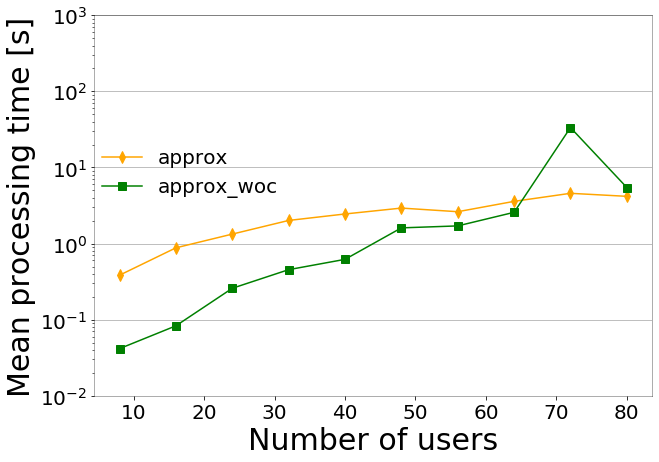

In [27]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**3), 
    xlabel='Number of users'
)

## Travel cost

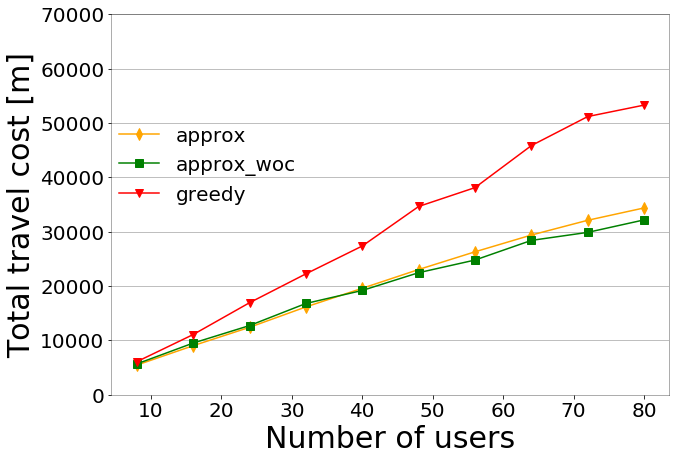

In [28]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(0,70000), 
    xlabel='Number of users', 
    legend_loc=(0, 0.48)
)

## Ride-sharing efficiency

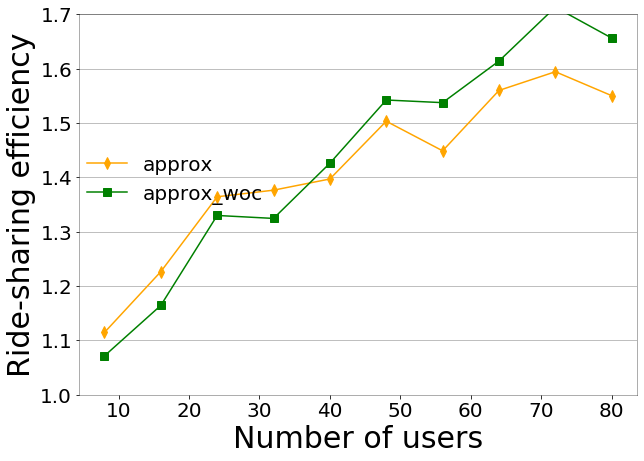

In [29]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.7), 
    xlabel='Number of users', 
    legend_loc=(0., 0.48)
)